In [1]:
import pandas as pd
import numpy as np
import os

In [63]:
os.chdir(workDirFoot)
os.listdir()

['comparison_SUM1.txt',
 'CEBP-1_footprint_ATAC-seq.pdf',
 'comparison_Arid5a.txt',
 'MCB_comparison_STB3.txt',
 'SPT15_footprint_ATAC-seq.pdf',
 'comparison_PAX7.txt',
 'comparison_SPT15.txt',
 'PAX7_footprint_ATAC-seq.pdf',
 'ONECUT2_footprint_ATAC-seq.pdf',
 'Arid5a_footprint_ATAC-seq.pdf',
 'Peaks_Arid5a_transform.csv',
 'STB3_footprint_ATAC-seq.pdf',
 'comparison_CEBP-1.txt',
 'comparison_ONECUT2.txt',
 'Peaks_SPT15_transform.csv',
 'Peaks_CEBP-1_transform.csv',
 'Peaks_PAX7_transform.csv',
 'Peaks_STB3_transform.csv',
 'Peaks_ONECUT2_transform.csv']

In [68]:
TF='Arid5a'

In [65]:
####footprint data preparation###
workDirFoot = '/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/footprint/footprintComparison_MCB/'
sigalData = pd.read_table(workDirFoot + f'comparison_{TF}.txt')
#将逗号数据转换成list
sigalData['Aggregate'] = sigalData['Aggregate'].str.split(',')
dataPeak = sigalData.loc[:,['Signal', 'Aggregate']]
dataPeak = dataPeak.set_index('Signal').T
# 将list拓展为行
dataPeak = dataPeak.explode(['LPS', 'MCB'], ',')
#添加位置信息
positions = np.linspace(-2000, 2000, 4000)
dataPeak['position'] = positions
dataPeak

Signal,LPS,MCB,position
0,0.1769,2.8074,-2000.00000
1,0.1768,2.8282,-1998.99975
2,0.1771,2.8495,-1997.99950
3,0.1771,2.8555,-1996.99925
4,0.1773,2.8624,-1995.99900
...,...,...,...
3995,0.1989,2.5915,1995.99900
3996,0.1990,2.6026,1996.99925
3997,0.1990,2.5846,1997.99950
3998,0.1983,2.5636,1998.99975


In [69]:
# dataPeak.to_csv(f'Peaks_{TF}_transform.csv', index=None)
dataPeakLast = pd.read_csv(f'Peaks_{TF}_transform.csv')
dataPeakLast

,LPS,MCB,position
0,0.1758,1.7882,-2000.00000
1,0.1762,1.7918,-1998.99975
2,0.1765,1.7980,-1997.99950
3,0.1762,1.7990,-1996.99925
4,0.1768,1.7980,-1995.99900
...,...,...,...
3995,0.2276,4.0890,1995.99900
3996,0.2277,4.0317,1996.99925
3997,0.2244,3.9710,1997.99950
3998,0.2244,4.0503,1998.99975


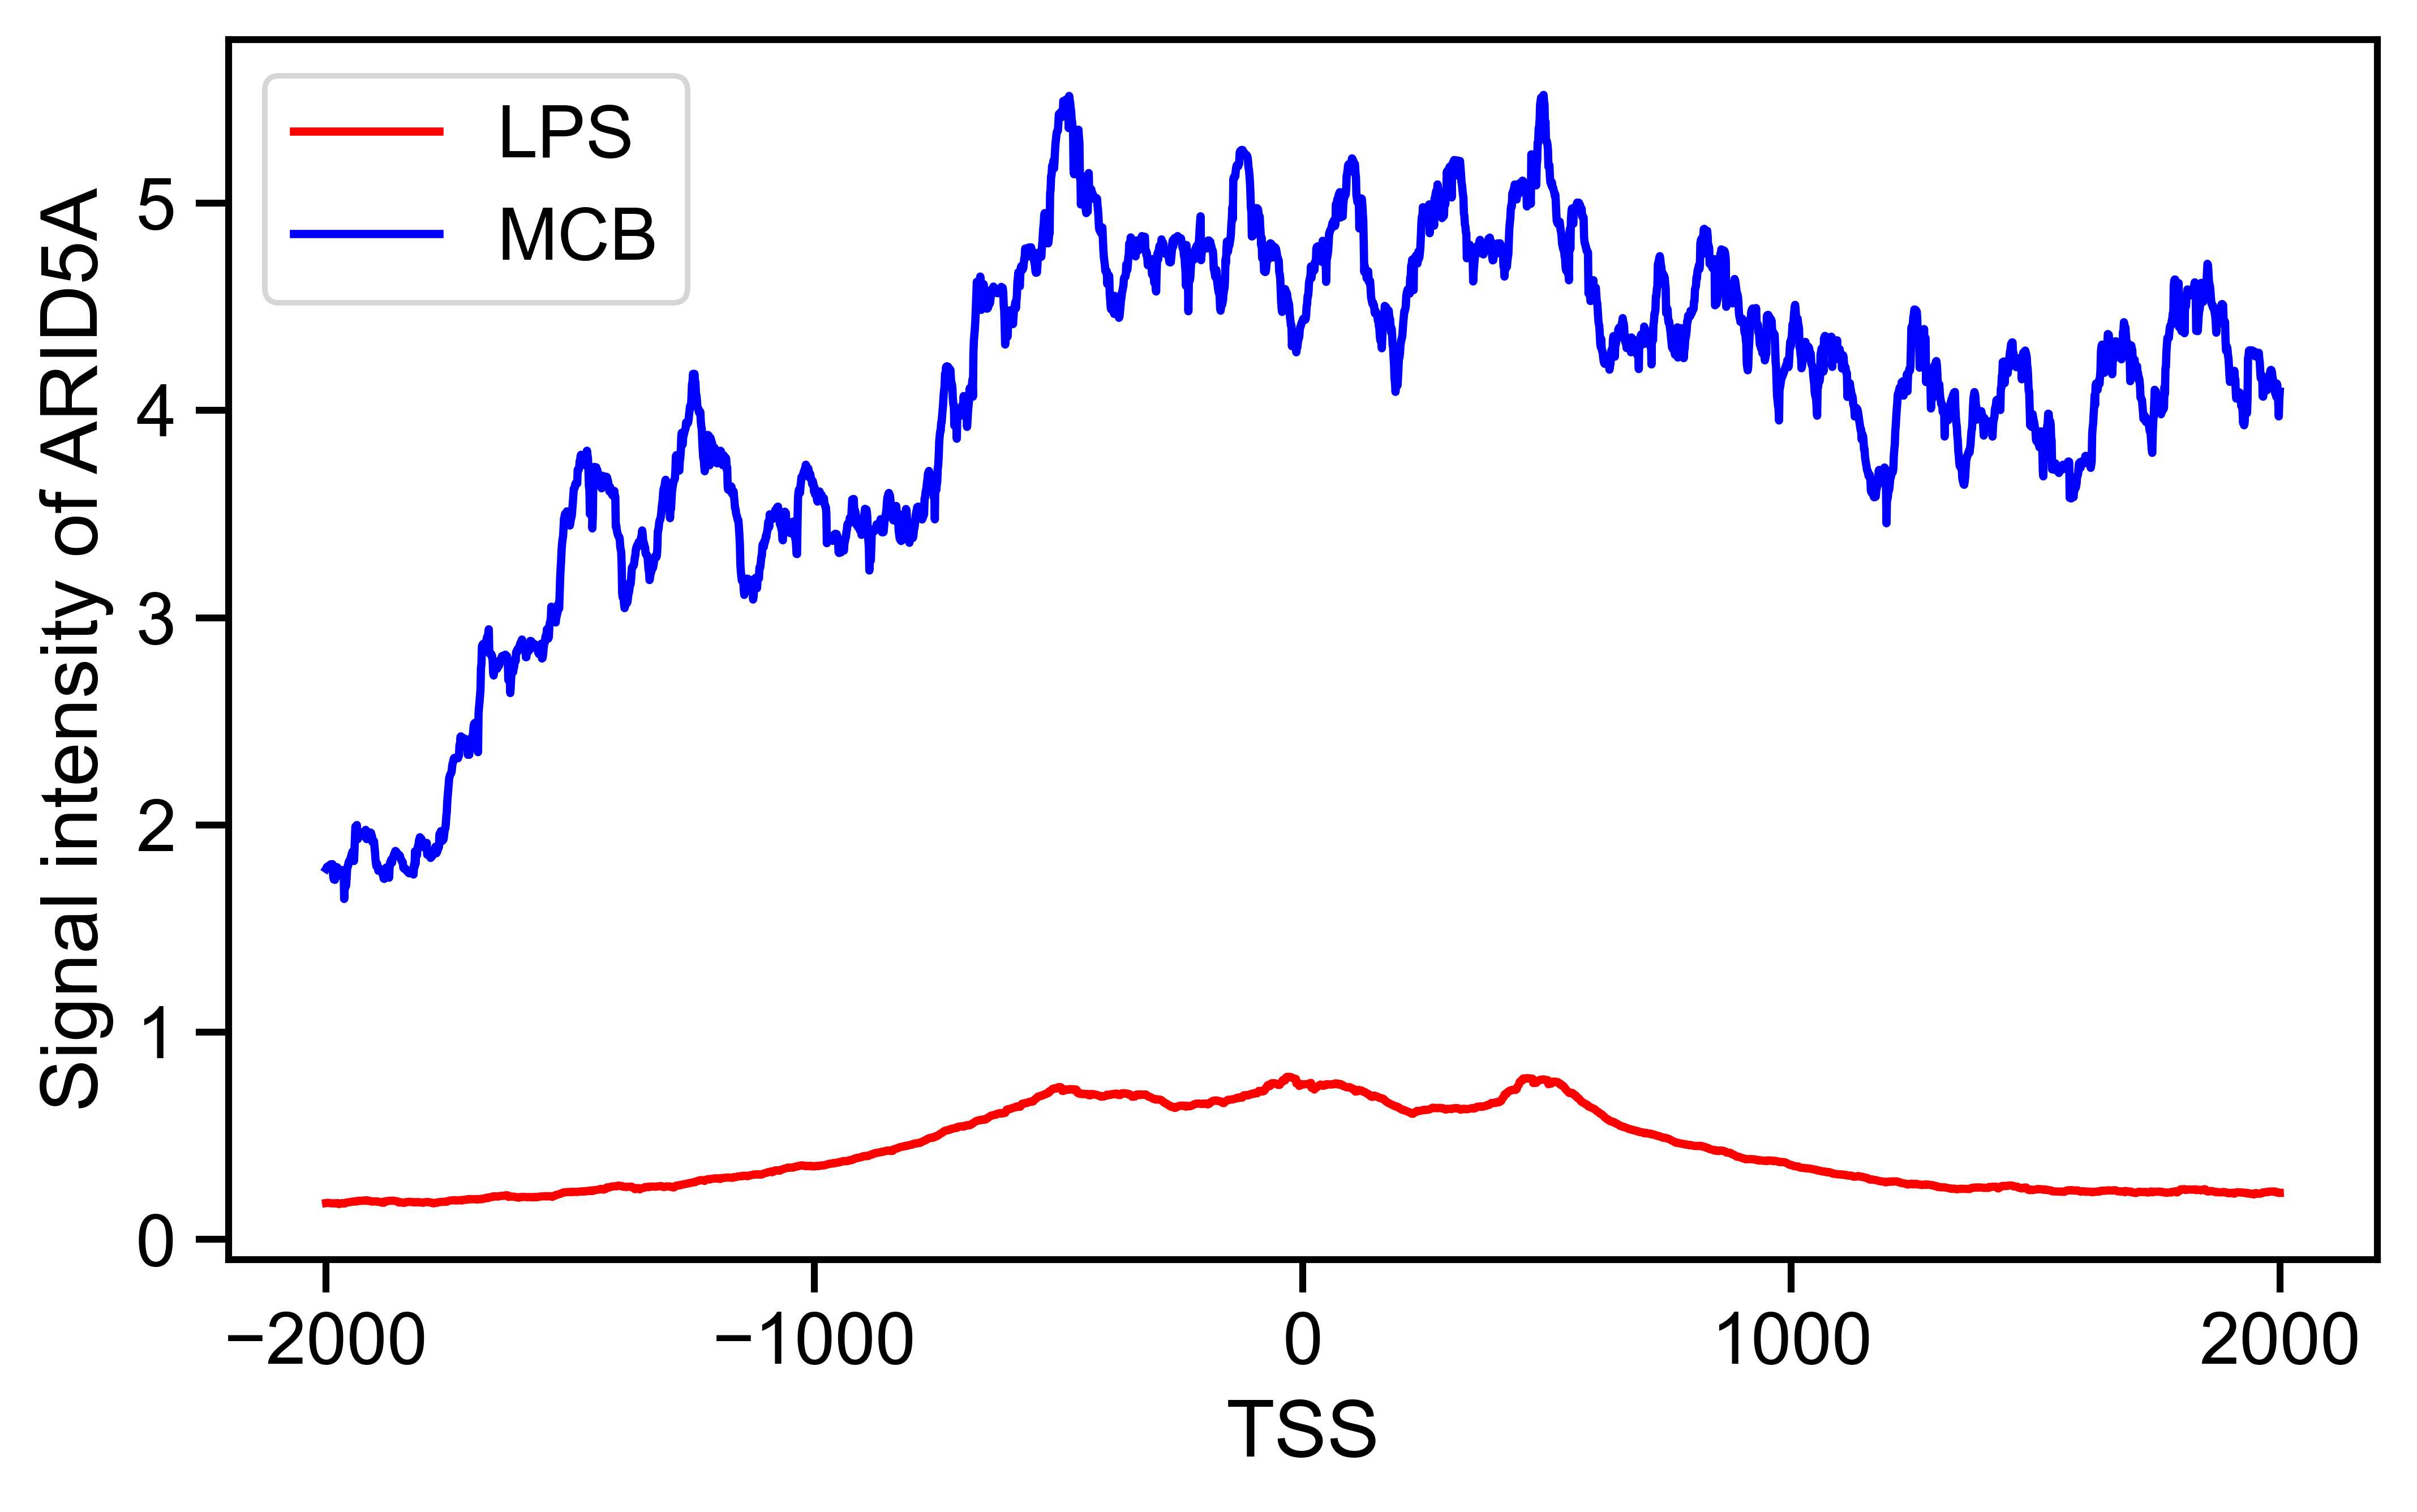

In [70]:
###footprint visualization###
import matplotlib.pyplot as plt
import seaborn as sns

TF = 'ARID5A'
data = dataPeakLast



with sns.plotting_context('notebook', font_scale=1.2):
    plt.rcParams['font.family'] = 'Arial'
    fig = plt.figure(figsize=(7, 4), dpi=700)
    ax = fig.add_subplot(111)
    ax.plot(data['position'], data['LPS'], color='r', label='LPS')
    ax.plot(data['position'], data['MCB'], color='b', label='MCB')
    # 设定x轴刻度，以1000为单位
    plt.xticks(ticks=np.arange(-2000, 2001, 1000))
    # sns.lineplot(dataPeakLast, x=dataPeakLast['position'], y=dataPeakLast['LPS'])
    # plt.plot(dataPeak['position'], dataPeak['MCB'])
    ax.set_ylabel(f"Signal intensity of {TF}")
    ax.set_xlabel("TSS")
    ax.legend()
    plt.savefig(f'{workDirFoot}/{TF}_footprint_ATAC-seq.pdf', dpi=700, bbox_inches='tight')



